<a href="https://colab.research.google.com/github/eko-andri-prasetyo/proyek-machine-learning/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Eko_Andri_Prasetyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [5]:
# **1. Import Library**
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder  # Tambahkan ini
import joblib

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
# ___ = pd_read_csv("___.csv")
# Gunakan dataset hasil clustering yang memiliki fitur Target
df = pd.read_csv("/content/data_clustering_inverse.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1
4,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,1


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.
X = df.drop('Target', axis=1)
y = df['Target']

# Encoding categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [7]:
# Buatlah model klasifikasi menggunakan Decision Tree
# Buatlah model klasifikasi menggunakan Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
import joblib
joblib.dump(dt_model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [9]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model
}

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

results_df = pd.DataFrame(results)
results_df

,Decision Tree,Random Forest
Accuracy,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0
F1-Score,1.0,1.0


In [11]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')
import joblib
joblib.dump(rf_model, 'explore_RandomForest_classification.h5')

['explore_RandomForest_classification.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [12]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1_weighted'
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [13]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.
y_pred_best = best_model.predict(X_test)
best_results = {
    'Accuracy': accuracy_score(y_test, y_pred_best),
    'Precision': precision_score(y_test, y_pred_best, average='weighted'),
    'Recall': recall_score(y_test, y_pred_best, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred_best, average='weighted')
}

print("Hasil Model Terbaik setelah Tuning:")
for metric, value in best_results.items():
    print(f"{metric}: {value:.4f}")

Hasil Model Terbaik setelah Tuning:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [14]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(__, 'tuning_classification.h5')
import joblib
joblib.dump(best_model, 'tuning_classification.h5')

['tuning_classification.h5']


EVALUASI SEMUA MODEL:
Decision Tree: F1-Score = 1.0000
Random Forest: F1-Score = 1.0000
Tuned Model: F1-Score = 1.0000
Best model: Decision Tree dengan F1-Score: 1.0000

Best model disimpan sebagai 'best_model_classification.h5'

DETAILED EVALUATION BEST MODEL (Decision Tree):
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       160

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



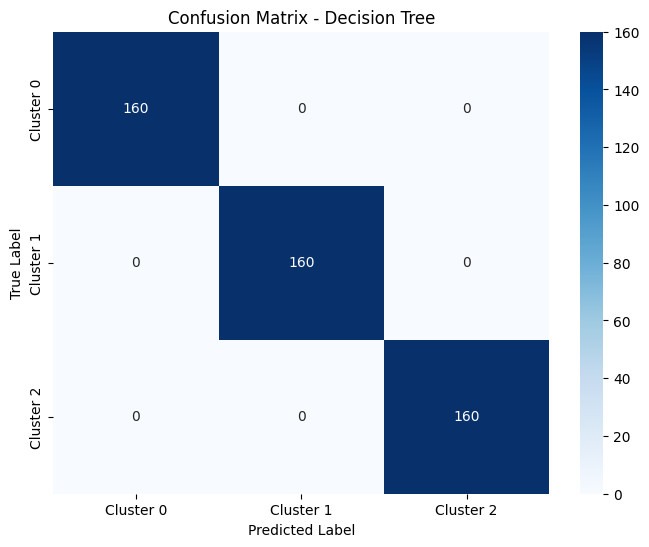

In [16]:
# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**

# ... (kode sebelumnya untuk Decision Tree, Random Forest, dan GridSearchCV)

# Menentukan best model berdasarkan evaluasi
# **1. Import Library**
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

best_model_name = None
best_f1_score = 0

print("\nEVALUASI SEMUA MODEL:")
print("=" * 50)
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}: F1-Score = {f1:.4f}")

    if f1 > best_f1_score:
        best_f1_score = f1
        best_model_name = name
        best_model = model

# Bandingkan dengan tuned model
y_pred_tuned = best_model.predict(X_test)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
print(f"Tuned Model: F1-Score = {f1_tuned:.4f}")

if f1_tuned > best_f1_score:
    best_model = best_model
    best_model_name = "Tuned_RandomForest"
    print(f"Best model: {best_model_name} dengan F1-Score: {f1_tuned:.4f}")
else:
    print(f"Best model: {best_model_name} dengan F1-Score: {best_f1_score:.4f}")

# Simpan best model sebagai opsional
joblib.dump(best_model, 'best_model_classification.h5')
print(f"\nBest model disimpan sebagai 'best_model_classification.h5'")

# Tampilkan detailed evaluation untuk best model
print(f"\nDETAILED EVALUATION BEST MODEL ({best_model_name}):")
print("=" * 50)
y_pred_best = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best, average='weighted'):.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
            yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

End of Code